# 계층적 군집 (3) - MNIST 데이터셋 (이미지)
## 1. 패키지 참조

In [12]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_digits
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## 2. 데이터 가져오기
### 1) 전체 데이터셋 로딩

In [14]:
digits = load_digits()
# digits

### 2) 무작위 50개 추출
- 추출할 이미지 수, 랜덤시드 고정

In [15]:
rnd_count = 50
np.random.seed(777)

- 무작위 50개에 대한 인덱스 생성

In [16]:
idx = np.random.choice(range(len(digits.data)), rnd_count)
idx

array([ 103,  815, 1595,  934, 1623,   71, 1693,  639,  116, 1447,  985,
        814, 1530,  792, 1319,  397,  654,   32,  321,  850,  340, 1349,
        577, 1567, 1211, 1127, 1098,  850, 1586, 1342,  967,  365,  836,
        824, 1350,  322,  202,   60,  967,  888, 1664,  819,  186,  642,
       1040,  355,  237, 1651,  171,  384])

- 무작위 인덱스에 대한 표본 추출

In [19]:
x = digits.data[idx]
print(x.shape)

(50, 64)


In [20]:
images = digits.images[idx]
images.shape

(50, 8, 8)

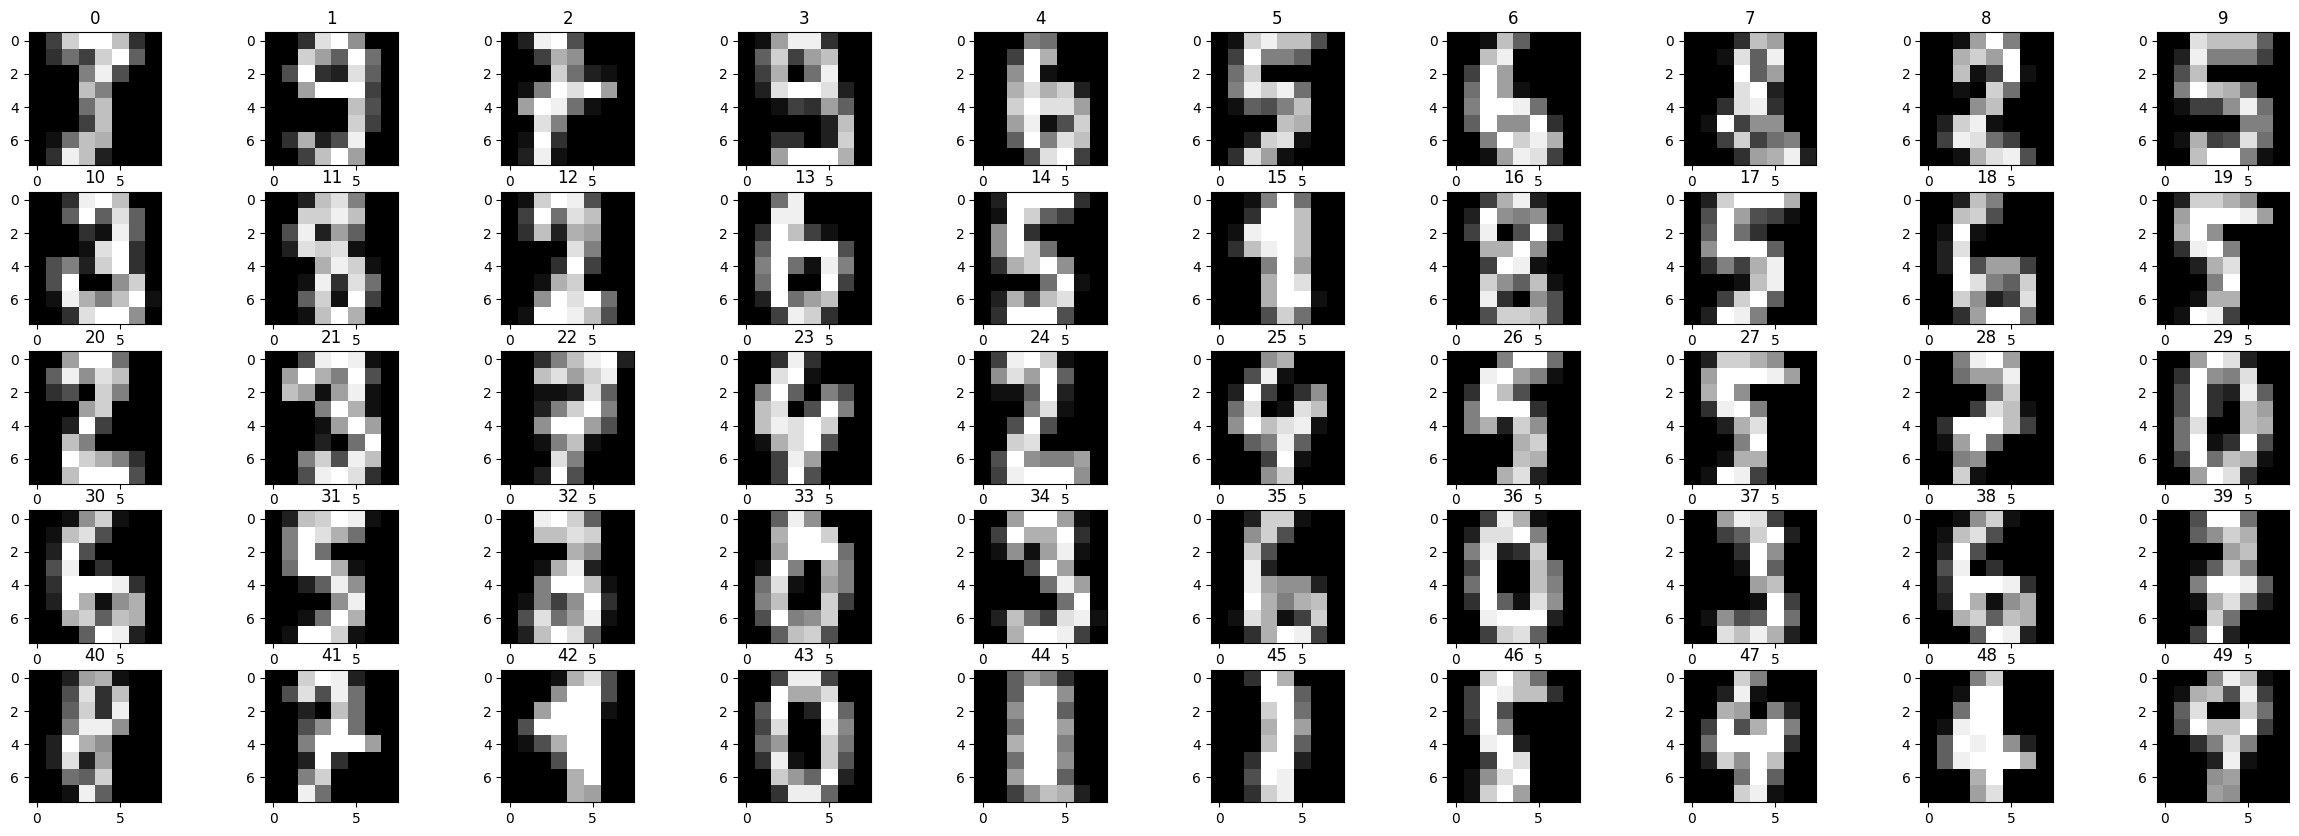

In [21]:
fig, ax = plt.subplots(5, 10, figsize=(30, 10))

idx = 0
for i in range(0, 5):
    for j in range(0, 10):
        ax[i][j].imshow(images[idx], cmap='gray')
        ax[i][j].set_title(str(idx))
        idx += 1

> imshow는 ax 파라미터가 없다, 그래서 밖에서 for문으로 돌려준 것

## 3. 군집 수행
dendrogram을 r로 받았을 때 r 안에 많은 정보가 담겨있다
- 색상 이름 목록 color_list
    - 'k'번째 항목은 'k'번째 링크의 섹상
- 인덱스 목록 icoord
    - 'k'번째 index
- 거리 목록 dcoord
    - 'k'번째 distance
- leaves
    - 'k'번째 ?

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C0', 'C0', 'C0']
[[35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [15.0, 15.0, 32.5, 32.5], [5.0, 5.0, 23.75, 23.75], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [95.0, 95.0, 105.0, 105.0], [125.0, 125.0, 135.0, 135.0], [115.0, 115.0, 130.0, 130.0], [100.0, 100.0, 122.5, 122.5], [85.0, 85.0, 111.25, 111.25], [62.5, 62.5, 98.125, 98.125], [14.375, 14.375, 80.3125, 80.3125], [145.0, 145.0, 155.0, 155.0], [175.0, 175.0, 185.0, 185.0], [165.0, 165.0, 180.0, 180.0], [150.0, 150.0, 172.5, 172.5], [205.0, 205.0, 215.0, 215.0], [195.0, 195.0, 210.0, 210.0], [225.0, 225.0, 235.0, 235.0], [255.0, 255.0, 265.0, 265.0], [245.0, 245.0, 260.0, 260.0], [230.0, 230.0, 252.5, 252.5], [202.5, 202.5, 241.25, 241.25], [1

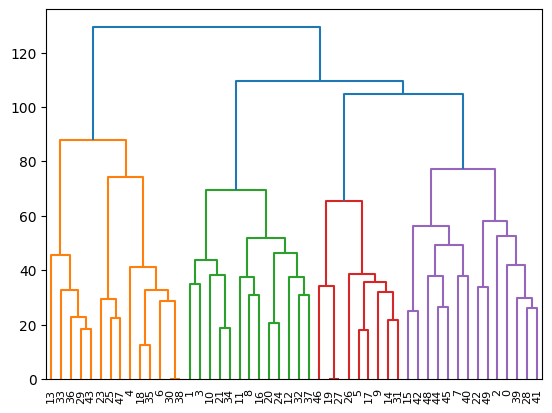

In [30]:
r = dendrogram(lnk)

print(r['color_list'])
print(r['icoord'])
print(r['dcoord'])
print(r['leaves'])

In [31]:
len(r['icoord'])

49

### 1) scipy 사용

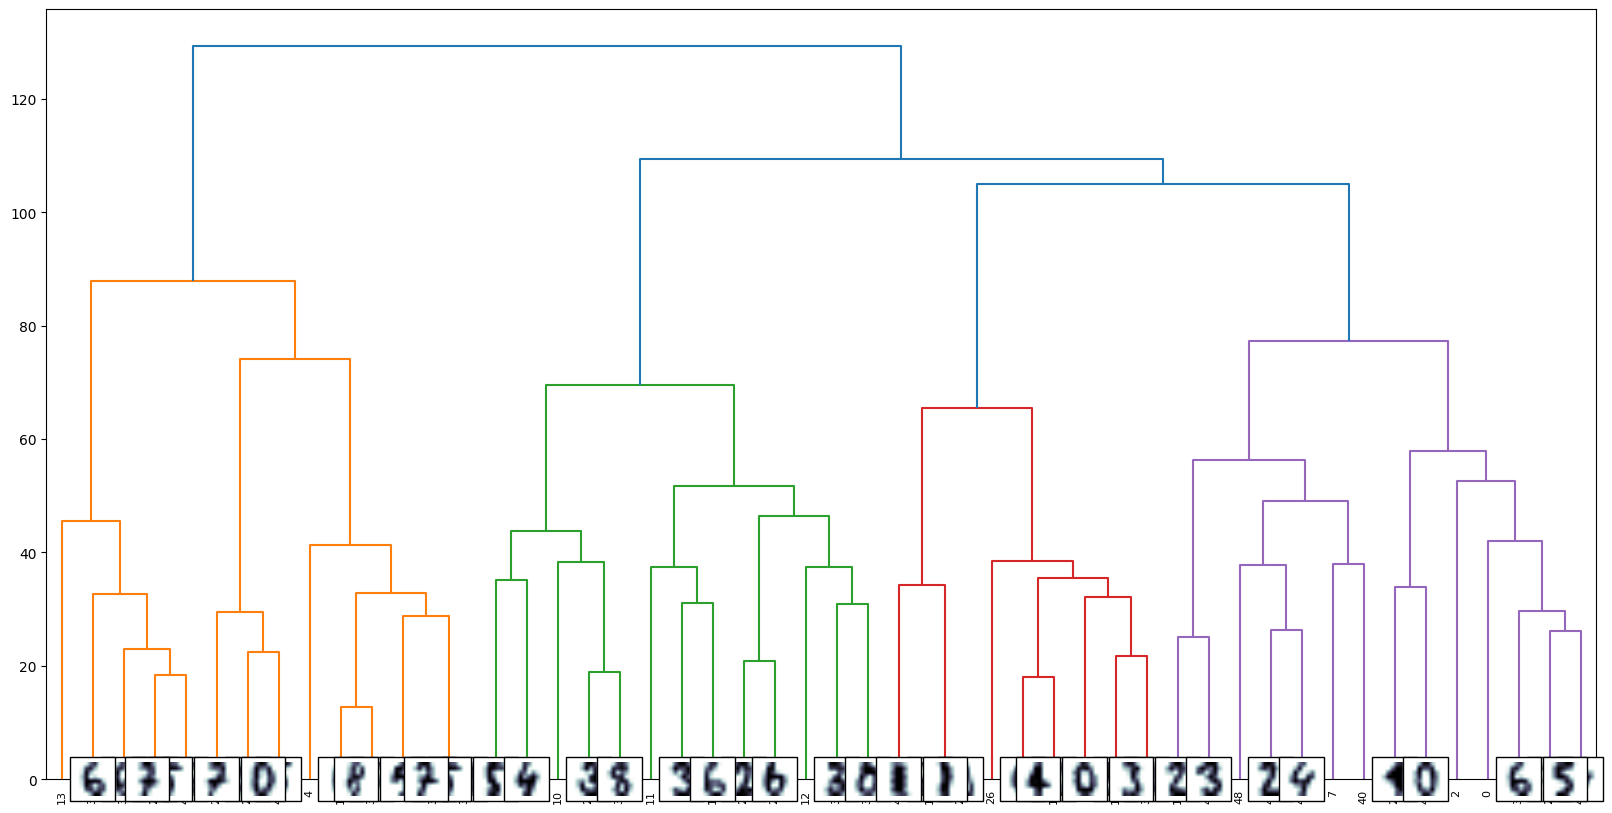

In [44]:
lnk = linkage(x, 'ward')

fig, ax = plt.subplots(1, 1, figsize = (20, 10))

r = dendrogram(lnk)

# 클러스터링 결과를 개별 변수로 추출
dcoord = np.array(r['dcoord'])
icoord = np.array(r['icoord'])
leaves = np.array(r['leaves'])
idx = np.argsort(dcoord[:, 2])

dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(lnk[:, 2].ravel())  # ravel(): 배열의 차원을 강제로 1차원으로 만든다; reshape(-1)과 같은 기능
label_pos = icoord[:, 1:3].ravel()[idx][:rnd_count]

for i in range(rnd_count-1):
    # 이미지 불러옴
    imagebox = OffsetImage(images[i], 
                           cmap=plt.cm.bone_r,
                           interpolation='bilinear',
                           zoom=3)        # zoom 파라미터를 넣어주면 출력되는 이미지 크기 조절 가능
    # 이미지를 ABBox로 감싸줌
    ab = AnnotationBbox(imagebox, (label_pos[i], 0))    # (label_pos[i], 0)는 (x값, y값)
    ax.add_artist(ab)

plt.show()
plt.close()